# Optimisation de $\tau_\mathrm{cross}$ pour le cumulant d'ordre 4.

### Systèmes : 1 particule confiné entre deux murs rigides.

Code origine : $\mathrm{\color{red}{Cumulant4\_fonction.py}}$.

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 24/01/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Cumulant4_fonction import C4_long, C4_court, Cross_time
# from Tau_cross_fonction import C4_long, C4_court, Cross_time
from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
from scipy import interpolate


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")

# Fonctions du problème:

In [3]:
# Gamma(z) para et perpendiculaire du pb.
def gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

def gamma_xy_eff(zi_1, a, eta, H):
    """
    Formule de Libshaber
    """
    # Mur Top
    gam_xy_T = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H-zi_1) + a)))
            + (a / (8 * ((H-zi_1) + a))) ** 3
            - (45 * a / (256 * ((H-zi_1) + a))) ** 4
            - (a / (16 * ((H-zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_B = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H+zi_1) + a)))
            + (a / (8 * ((H+zi_1) + a))) ** 3
            - (45 * a / (256 * ((H+zi_1) + a))) ** 4
            - (a / (16 * ((H+zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_0 = 6 * np.pi * a * eta

    return (gam_xy_T + gam_xy_B - gam_xy_0)


# #Potentiel
# def V_theo(z, B, lD, lB, kBT):
#     return B*kBT*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(+z/lD)) + kBT/lB*z

# #Coefs de difusion perpensiculaire et parralèlle aux 2 murs
# def D_perp(z, lD, a, eta, kBT, H):
#     return kBT/gamma_z_eff(z, a, eta, H)

# def D_para(z, lD, a, eta, kBT, H):
#     return kBT/gamma_xy_eff(z, a, eta, H)



In [4]:
eta=0.001
kBT=1.38e-23*300
B=4.8

In [56]:
H = 1e-6
a = 1.5e-6
lB = np.linspace(150e-9, 500e-9, 10)
lD = np.linspace(20e-9, 100e-9, 10)
Tau_cross = np.zeros((len(lD), len(lB)))

for n, D in tqdm(enumerate(lD)):
    for m, B in enumerate(lB):
    
        V_theo = lambda z: B*kBT*np.exp(-H/D)*(np.exp(-z/D) + np.exp(+z/D)) + kBT/B*z
        D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, H)
        D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, H)

        
        Tau_cross[n,m] = Cross_time(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-H+H*1e-3, b=+H-H*1e-3)

10it [00:24,  2.46s/it]


In [57]:
Tau_cross

array([[ 94.67339057, 122.39528932, 148.53116686, 171.77717451,
        191.41441438, 207.28499149, 219.61929614, 228.85438861,
        235.4986354 , 240.05084332],
       [ 94.67339041, 122.39528899, 148.53116632, 171.77717372,
        191.41441331, 207.28499011, 219.61929444, 228.85438658,
        235.49863304, 240.05084063],
       [ 94.67339037, 122.39528883, 148.53116599, 171.77717319,
        191.41441254, 207.28498907, 219.61929313, 228.85438498,
        235.49863115, 240.05083847],
       [ 94.67339041, 122.39528878, 148.53116582, 171.77717286,
        191.41441201, 207.28498832, 219.61929214, 228.85438375,
        235.49862968, 240.05083675],
       [ 94.6733905 , 122.39528883, 148.53116578, 171.77717269,
        191.41441168, 207.28498781, 219.61929143, 228.85438284,
        235.49862856, 240.05083543],
       [ 94.67339062, 122.39528893, 148.53116583, 171.77717264,
        191.41441152, 207.2849875 , 219.61929096, 228.8543822 ,
        235.49862775, 240.05083445],
       [ 9

In [58]:
np.shape(Tau_cross), np.shape(lD), np.shape(lB)

((10, 10), (10,), (10,))

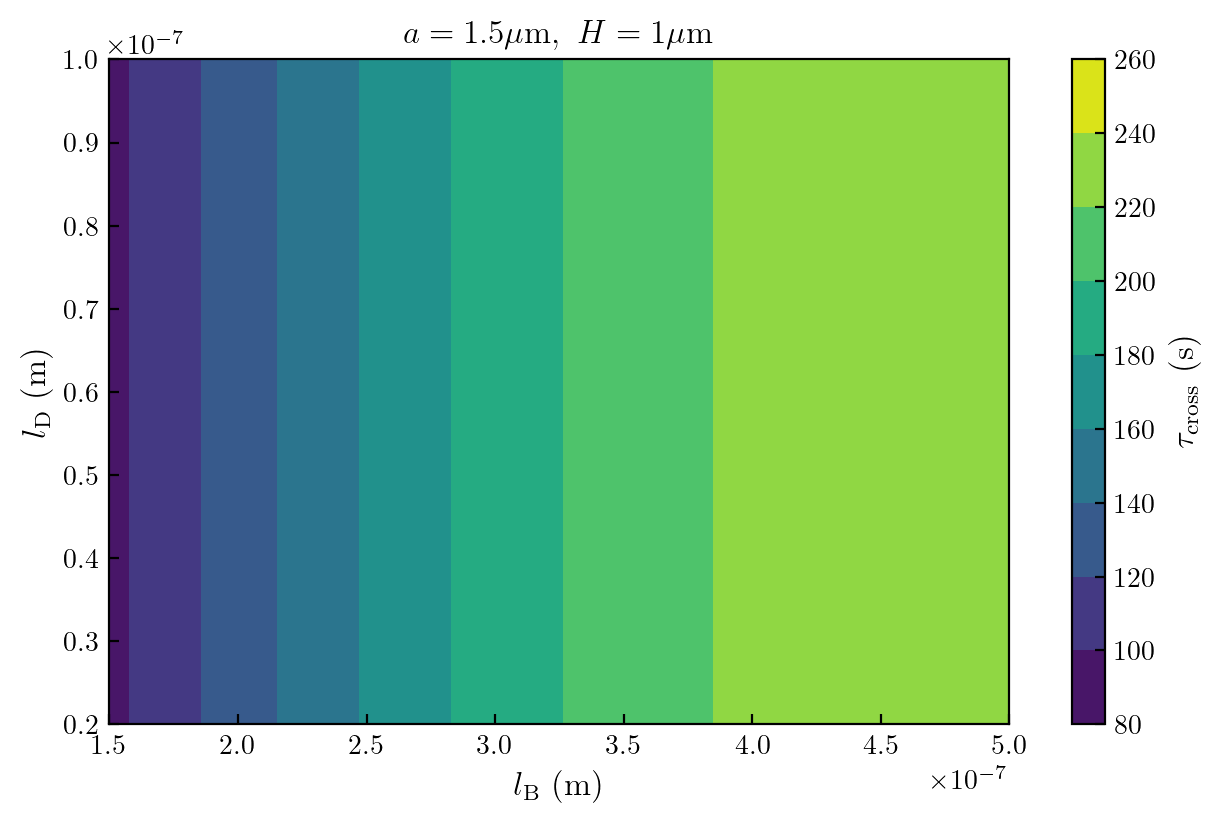

In [60]:
lDD, lBB = np.meshgrid(lB, lD, sparse=True)
levels = [0, 2, 4, 6, 8, 10, 15, 20,]


fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(lB[:],lD,Tau_cross[:,:])#, levels,cmap="plasma",)
cbar = fig1.colorbar(CS)
h = plt.contourf
plt.xlabel(r"$l_\mathrm{B}~(\mathrm{m})$")
plt.ylabel(r"$l_\mathrm{D}~(\mathrm{m})$")
cbar.ax.set_ylabel(r"$\tau_\mathrm{cross}~(\mathrm{s})$")
plt.title(r"$a = 1.5 \mu \mathrm{m}, ~ H = 1 \mu \mathrm{m}$")
plt.show()
# plt.savefig("t_cross-lD-lB_(4).png")

#### $\rightarrow$ Commentaires: Pas d'effet de $l_D$

# $\tau_\mathrm{cross} = f(H)$

In [9]:
a = 1.5e-6
lD_h = 50e-9
lB_h = 150e-9


hh = np.linspace(0.01e-6, 4.0e-6, 10)

Tau_cross_h = np.zeros(len(hh))

for o, h in tqdm(enumerate(hh)):
    V_theo = lambda z: B*kBT*np.exp(-h/lD_h)*(np.exp(-z/lD_h) + np.exp(+z/lD_h)) + kBT/lB_h*z
    D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, h)
    D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, h)
    
    Tau_cross_h[o] = Cross_time(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-(h-h*1e-3), b=+(h-h*1e-3))

10it [01:55, 11.55s/it]


In [41]:
# plt.loglog(hh, Tau_cross_h, "o")
# plt.xlabel(r"$H ~ (\mathrm{m})$")
# plt.ylabel(r"$\tau_\mathrm{cross} ~ (\mathrm{s})$")

In [29]:
a = 1.5e-6
lD_H = 50e-9
lB_H = 150e-9


HH = np.linspace(0.01e-6, 2.0e-6, 10)
lB_H = np.linspace(150e-9, 500e-9, 10)

Tau_cross_H = np.zeros((len(HH), len(lB_H)))

for o, h in tqdm(enumerate(HH)):
    for l, b in enumerate(lB_H):
        V_theo = lambda z: B*kBT*np.exp(-h/lD_h)*(np.exp(-z/lD_h) + np.exp(+z/lD_h)) + kBT/b*z
        D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, h)
        D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, h)
    
        Tau_cross_H[o, l] = Cross_time(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-(h-h*1e-3), b=+(h-h*1e-3))

10it [01:20,  8.08s/it]


In [34]:
Tau_cross_H[Tau_cross_H > 80] = 0

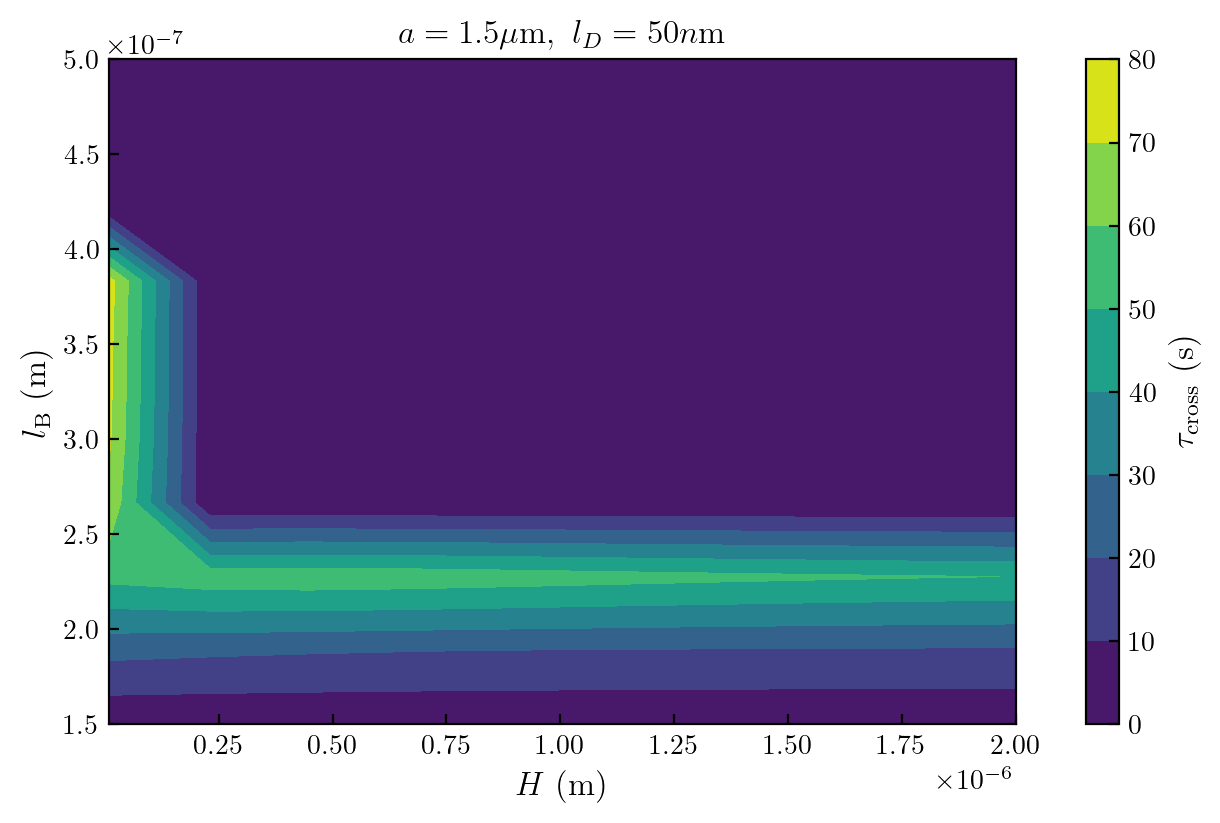

In [35]:
HHH, lDD_H = np.meshgrid(HH, lB_H, sparse=True)
# levels = [0, 2, 4, 6, 8, 10, 15, 20,]


fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(HH, lB_H, Tau_cross_H[:,:])#, levels,cmap="plasma",)
cbar = fig1.colorbar(CS)
# h = plt.contourf
plt.xlabel(r"$H~(\mathrm{m})$")
plt.ylabel(r"$l_\mathrm{B}~(\mathrm{m})$")
cbar.ax.set_ylabel(r"$\tau_\mathrm{cross}~(\mathrm{s})$")
plt.title(r"$a = 1.5 \mu \mathrm{m}, ~ l_D = 50 n \mathrm{m}$")
plt.show()
# plt.savefig("t_cross-lD-lB_(4).png")

In [36]:
a = 1.5e-6
lD_H = 5e-9
lB_H = 150e-9


HH = np.linspace(0.01e-6, 2.0e-6, 10)
lB_H = np.linspace(150e-9, 500e-9, 10)

Tau_cross_H = np.zeros((len(HH), len(lB_H)))

for o, h in tqdm(enumerate(HH)):
    for l, b in enumerate(lB_H):
        V_theo = lambda z: B*kBT*np.exp(-h/lD_h)*(np.exp(-z/lD_h) + np.exp(+z/lD_h)) + kBT/b*z
        D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, h)
        D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, h)
    
        Tau_cross_H[o, l] = Cross_time(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-(h-h*1e-3), b=+(h-h*1e-3))

10it [01:14,  7.41s/it]


In [39]:
Tau_cross_H[Tau_cross_H > 80] = 0

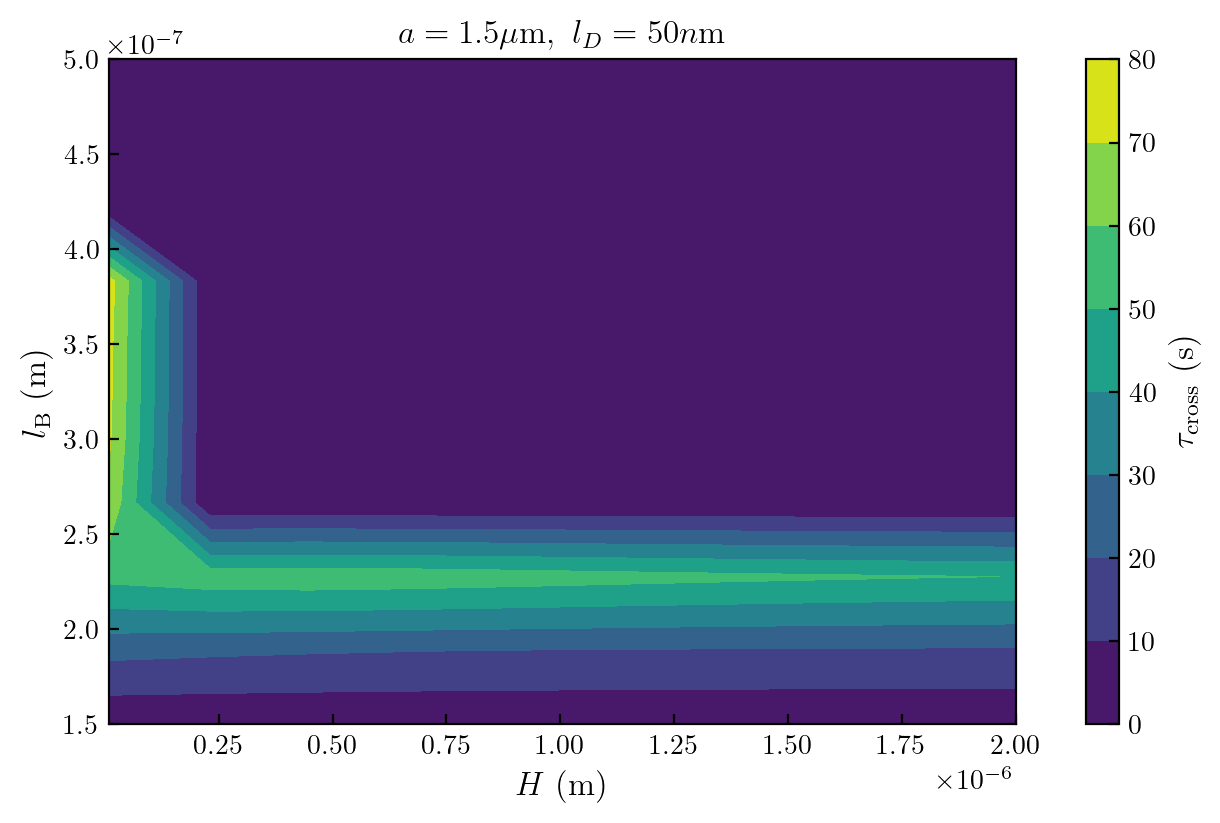

In [40]:
HHH, lDD_H = np.meshgrid(HH, lB_H, sparse=True)
# levels = [0, 2, 4, 6, 8, 10, 15, 20,]


fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(HH, lB_H, Tau_cross_H[:,:])#, levels,cmap="plasma",)
cbar = fig1.colorbar(CS)
# h = plt.contourf
plt.xlabel(r"$H~(\mathrm{m})$")
plt.ylabel(r"$l_\mathrm{B}~(\mathrm{m})$")
cbar.ax.set_ylabel(r"$\tau_\mathrm{cross}~(\mathrm{s})$")
plt.title(r"$a = 1.5 \mu \mathrm{m}, ~ l_D = 50 n \mathrm{m}$")
plt.show()

#### $\rightarrow$ Commentaires: Ici divergence dans la calcul de $\tau_\mathrm{cross}$ à cause de $H$ petit. 
#### l'idée est de tuer la répultion du mur avec $B=0$ pour s'affranchir des effets de $l_D$. Il ne restera plus que $H$ et $l_B$.